## Pandas

### Instructions

This assignment will be done completely inside this Jupyter notebook with answers placed in the cell provided.

All python imports that are needed shown.

Follow all the instructions in this notebook to complete these tasks.    

Make sure the CSV data files is in the same folder as this notebook - alumni.csv, groceries.csv

In [1]:
# Imports needed to complete this assignment

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Question 1 :  Import CSV file (1 Mark)


Write code to load the alumni csv dataset into a Pandas DataFrame called 'alumni'.


In [2]:
#q1 (1)

alumni=pd.DataFrame()
alumni=pd.read_csv("alumni.csv")

### Question 2 :  Understand the data set (5 Marks)

Use the following pandas commands to understand the data set: a) head, b) tail, c) dtypes, d) info, e) describe 

In [88]:
#a) (1)
alumni.head(5) #shows the first five 

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


In [4]:
#b) (1)
alumni.tail(5) #shows the last five

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($)
83,2007,Male,Single,Standard Diploma,No,75000,12066,"$16,000"
84,2008,M,Single,College Prep Diploma,Yes,65000,12066,"$72,000"
85,2009,Male,Married,Standard Diploma,No,75000,12066,"$46,000"
86,2005,Female,Divorced,Standard Diploma,Yes,100000,12067,"$32,000"
87,2006,Male,Married,Standard Diploma,Yes,75000,12067,"$67,000"


In [5]:
#c) (1)
alumni.dtypes #shows the data types in the various series

Year Graduated     int64
Gender            object
Marital Status    object
Diploma Type      object
Defaulted         object
Salary             int64
Fee                int64
Savings ($)       object
dtype: object

In [6]:
#d) (1) 
alumni.info()

#Understand/Have an idea of what the data comprises of

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year Graduated  88 non-null     int64 
 1   Gender          88 non-null     object
 2   Marital Status  88 non-null     object
 3   Diploma Type    88 non-null     object
 4   Defaulted       88 non-null     object
 5   Salary          88 non-null     int64 
 6   Fee             88 non-null     int64 
 7   Savings ($)     88 non-null     object
dtypes: int64(3), object(5)
memory usage: 5.6+ KB


In [7]:
#e) (1)  
alumni.describe() #Statistical summary of the numerical columns in the dataframe

,Year Graduated,Salary,Fee
count,88.000000,88.000000,88.000000
mean,2006.477273,84090.909091,11708.727273
std,1.560852,21234.128008,1110.647949
min,2004.000000,35000.000000,10869.000000
25%,2005.000000,75000.000000,10968.000000
50%,2006.500000,75000.000000,11696.000000
75%,2008.000000,90000.000000,12058.250000
max,2009.000000,160000.000000,20960.000000


### Question 3 :  Cleaning the data set - part A (3 Marks)

a) Use clean_currency method below to strip out commas and dollar signs from Savings ($) column and put into a new column called 'Savings'.

In [8]:
alumni.columns

Index(['Year Graduated', 'Gender', 'Marital Status', 'Diploma Type',
       'Defaulted', 'Salary', 'Fee', 'Savings ($)'],
      dtype='object')

In [9]:
def clean_currency(curr):
    return float(curr.replace(",", "").replace("$", ""))

clean_currency("$66,000")
 

66000.0

In [10]:
#a) (2)

alumni["Savings"]=alumni["Savings ($)"].apply(lambda x: f"{clean_currency(x)}")
alumni.head()

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
0,2004,Male,Single,Standard Diploma,Yes,125000,10869,"$86,000",86000.0
1,2005,Male,Married,College Prep Diploma,No,100000,10869,"$116,000",116000.0
2,2006,Female,Single,Standard Diploma,Yes,70000,10869,"$52,000",52000.0
3,2007,Male,Married,Standard Diploma,No,120000,10869,"$76,000",76000.0
4,2006,Female,Divorced,Standard Diploma,Yes,95000,11948,"$52,000",52000.0


b) Uncomment 'alumni.dtypes.Savings' to check that the type change has occurred

In [11]:
#b) (1)
alumni.dtypes.Savings

dtype('O')

In [69]:
alumni.Savings=alumni.Savings.astype(float) #converts the Savings column to a float from object
alumni.dtypes.Savings

dtype('float64')

### Question 4 :  Cleaning the data set - part B (5 Marks)

a) Run the 'alumni["Gender"].value_counts()' to see the incorrect 'M' fields that need to be converted to 'Male'

In [12]:
# a) (1)
alumni["Gender"].value_counts()

Male      46
Female    39
M          3
Name: Gender, dtype: int64

b) Now use a '.str.replace' on the 'Gender' column to covert the incorrect 'M' fields. Hint: We must use ^...$ to restrict the pattern to match the whole string. 

In [13]:
# b) (1)
alumni["Gender"].str.replace("M$", "Male", regex=True)

0       Male
1       Male
2     Female
3       Male
4     Female
       ...  
83      Male
84      Male
85      Male
86    Female
87      Male
Name: Gender, Length: 88, dtype: object

In [14]:
# b) (1)


c) That didn't the set alumni["Gender"] column however. You will need to update the column when using the replace command 'alumni["Gender"]=<replace command>', show how this is done below

In [15]:
# c) (1)
alumni["Gender"]=alumni["Gender"].str.replace("M$", "Male",regex=True)
alumni["Gender"]

0       Male
1       Male
2     Female
3       Male
4     Female
       ...  
83      Male
84      Male
85      Male
86    Female
87      Male
Name: Gender, Length: 88, dtype: object

d) You can set it directly by using the df.loc command, show how this can be done by using the 'df.loc[row_indexer,col_indexer] = value' command to convert the 'M' to 'Male'

In [16]:
# d) (1)
alumni.loc[alumni["Gender"]=="M"]["Gender"]

e) Now run the 'value_counts' for Gender again to see the correct columns - 'Male' and 'Female' 

In [17]:
# e) (1)
alumni["Gender"].value_counts()

Male      49
Female    39
Name: Gender, dtype: int64

### Question 5 :  Working with the data set (4)

a) get the median, b) mean and c) standard deviation for the 'Salary' column

In [18]:
# a)(1)
alumni["Salary"].median()

75000.0

In [19]:
# b)(1)
alumni["Salary"].mean()

84090.90909090909

In [20]:
# c)(1)
alumni["Salary"].std()

21234.128008173615

d) identify which alumni paid more than $15000 in fees, using the 'Fee' column

In [21]:
# d) (1)
alumni[alumni["Fee"]>15000]

,Year Graduated,Gender,Marital Status,Diploma Type,Defaulted,Salary,Fee,Savings ($),Savings
18,2006,Male,Married,Standard Diploma,No,140000,20960,"$72,000",72000.0


### Question 6 :  Visualise the data set (4 Marks)

a) Using the 'Diploma Type' column, plot a bar chart and show its value counts.

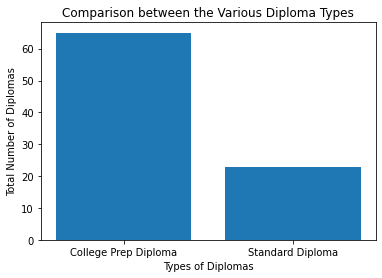

In [85]:
#a) (1)
diplomaType=[diploma for diploma, df in alumni.groupby(["Diploma Type"])]

diplomaCount=alumni["Diploma Type"].value_counts()

plt.bar(diplomaType, diplomaCount)

plt.ylabel("Total Number of Diplomas")

plt.xlabel("Types of Diplomas")

plt.title("Comparison between the Various Diploma Types")

plt.show()

b) Now create a box plot comparison between 'Savings' and 'Salary' columns

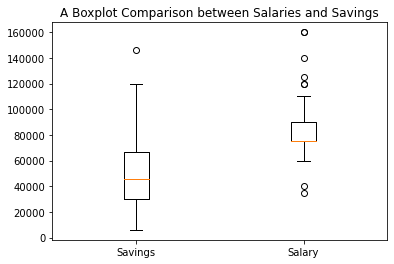

In [75]:
#b) (1)
sav= alumni.Savings #assign savings values

sal= alumni.Salary ##assign savings values

label=["Savings", "Salary"]

plt.boxplot([sav, sal], labels=label)

plt.title("A Boxplot Comparison between Salaries and Savings")

plt.show()

c) Generate a histogram with the 'Salary' column and use 12 bins.

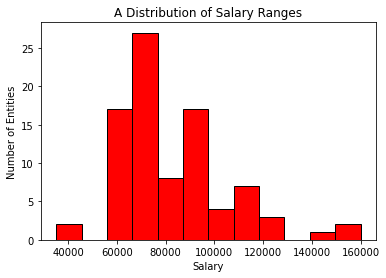

In [30]:
#c) (1)
plt.hist(alumni["Salary"], bins=12, color="red", edgecolor="black")

plt.xlabel("Salary")

plt.ylabel("Number of Entities")

plt.title("A Distribution of Salary Ranges")

plt.show()

d) Generate a scatter plot comparing 'Salary' and 'Savings' columns.

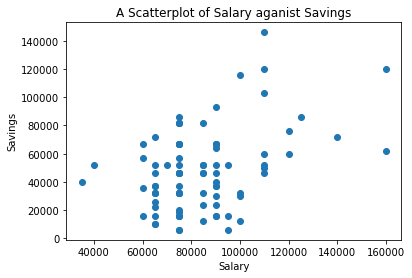

In [72]:
#d) (1)
x=alumni["Salary"]

y=alumni["Savings"]

plt.scatter(x, y)

plt.xlabel("Salary")

plt.ylabel("Savings")

plt.title("A Scatterplot of Salary aganist Savings")

plt.show()

### Question 7 :  Contingency Table (2 Marks)

Using both the 'Martial Status' and 'Defaulted' create a contingency table. Hint: crosstab

In [87]:
# Q7 (2)
pd.crosstab(alumni["Marital Status"], alumni.Defaulted, margins=True)

Defaulted,No,Yes,All
Marital Status,,,
Divorced,8,11,19
Married,19,16,35
Single,9,25,34
All,36,52,88
